## CASO PRÁCTICO
### CARLOS CALÁN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
warnings.filterwarnings("ignore")
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score

#### 1. Importe la base de datos a una base en Jupyter Notebook con pandas. 

In [2]:
df=pd.read_csv(r"C:\Users\ccalan\Downloads\Walmart(1).csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


#### 2. Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención? 


In [4]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [5]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [6]:
df.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


- Podemos observar que existen algunas columnas que son variables categóricas pero se están detectando como que fueran numéricas, como 'Holiday_Flag', 'Store'.
- Se tiene el valor de las ventas semanales, por ende sería necesario tener el número de semana 

In [7]:
df['Holiday_Flag'] = df['Holiday_Flag'].astype(str)
df['Store'] = df['Store'].astype(str)
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
#df['Year'] = df['Year'].astype(str)
df['Month']=df['Date'].dt.month
#df['Month'] = df['Month'].astype(str)
df['Weekday']=df['Date'].dt.weekday
#df['Weekday'] = df['Weekday'].astype(str)
df.drop(['Date'], axis=1, inplace=True)

In [8]:
df.describe(include='all')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Weekday
count,6435,6.435000e+03,6435,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,45,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,143,NaN,5985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.046965e+06,NaN,60.663782,3.358607,171.578394,7.999151,2010.965035,6.475524,3.573427
std,NaN,5.643666e+05,NaN,18.444933,0.459020,39.356712,1.875885,0.797019,3.321797,1.426581
min,NaN,2.099862e+05,NaN,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,0.000000
25%,NaN,5.533501e+05,NaN,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,4.000000
50%,NaN,9.607460e+05,NaN,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,4.000000
75%,NaN,1.420159e+06,NaN,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,4.000000


In [9]:
df.nunique().sort_values()

Holiday_Flag       2
Year               3
Weekday            7
Month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

#### 3. Evalúe si la base contiene datos perdidos. 


In [10]:
missing_values = df.isna().sum()
print (missing_values)

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Weekday         0
dtype: int64


#### 4. Evalúe si alguna de las variables contiene datos atípicos (outliers). 
#### De ser el caso, detalle cuáles y qué método estadístico aplicarán para corregir.  


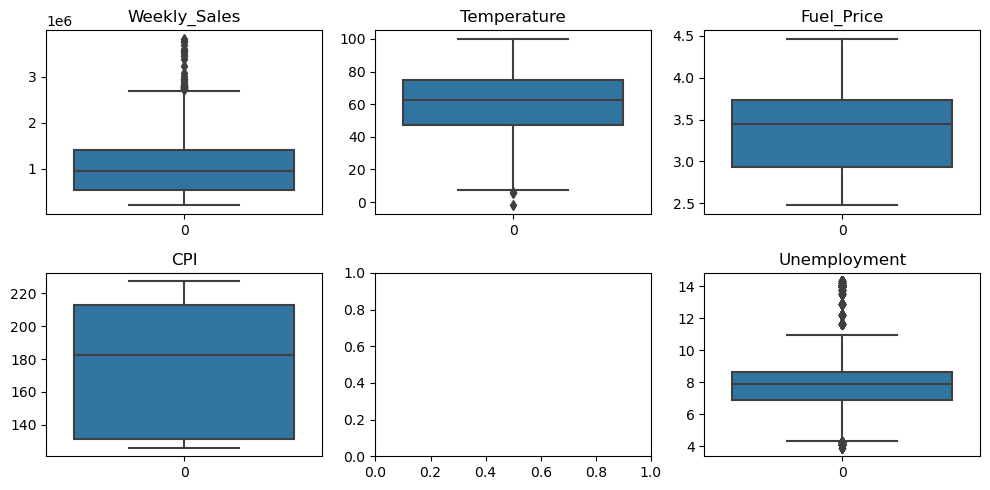

In [11]:
# Box plots
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['Weekly_Sales'], ax = axs[0,0])
plt1.set_title('Weekly_Sales')
plt2 = sns.boxplot(df['Temperature'], ax = axs[0,1])
plt2.set_title('Temperature')
plt3 = sns.boxplot(df['Fuel_Price'], ax = axs[0,2])
plt3.set_title('Fuel_Price')
plt4 = sns.boxplot(df['CPI'], ax = axs[1,0])
plt4.set_title('CPI')
plt5 = sns.boxplot(df['Unemployment'], ax = axs[1,2])
plt5.set_title('Unemployment')

plt.tight_layout()

In [12]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Weekly_Sales'] < (Q1 - 1.5 * IQR)) |(df['Weekly_Sales'] > (Q3 + 1.5 * IQR)))]
df.shape


(6401, 10)

In [13]:

Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Unemployment'] < (Q1 - 1.5 * IQR)) |(df['Unemployment'] > (Q3 + 1.5 * IQR)))]
df.shape

(5920, 10)

#### 5. Grafique las distribuciones de las variables y a priori comente sobre ellas. 

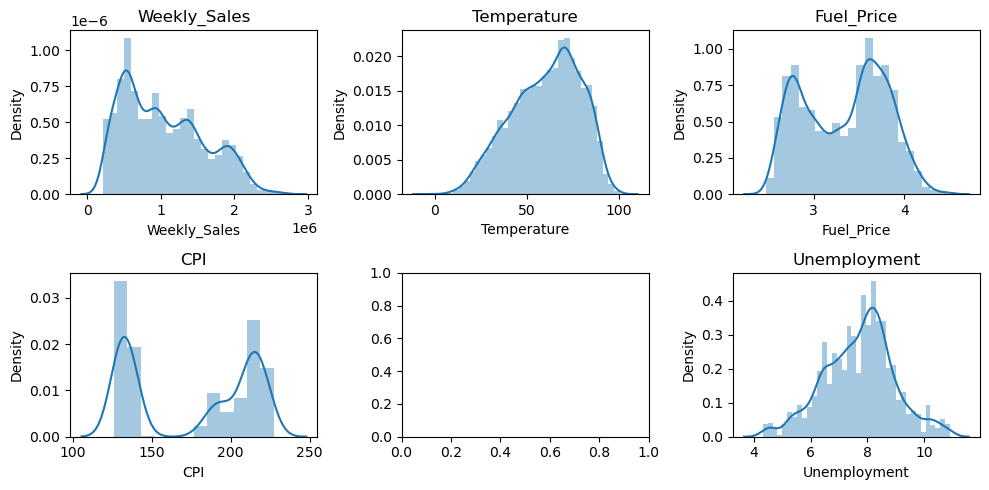

In [14]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.distplot(df['Weekly_Sales'], ax = axs[0,0])
plt1.set_title('Weekly_Sales')
plt2 = sns.distplot(df['Temperature'], ax = axs[0,1])
plt2.set_title('Temperature')
plt3 = sns.distplot(df['Fuel_Price'], ax = axs[0,2])
plt3.set_title('Fuel_Price')
plt4 = sns.distplot(df['CPI'], ax = axs[1,0])
plt4.set_title('CPI')
plt5 = sns.distplot(df['Unemployment'], ax = axs[1,2])
plt5.set_title('Unemployment')
plt.tight_layout()

#### 6. Obtenga las correlaciones entre los datos de corte numérico. 

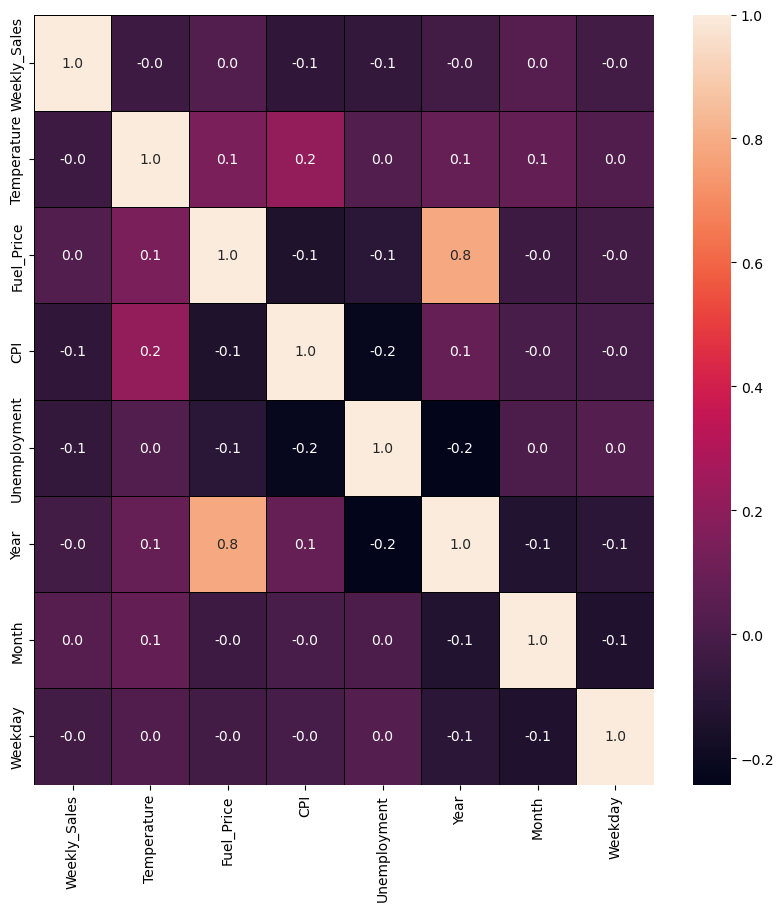

In [15]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

#### 7. Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.

- La variable objetivo será la venta semanal (Week_Sales) y dentro del modelo se introduciran al resto de variables.

#### 8. Indique que tipo de modelación realizarán y porqué. 

- Se realizará una regresión lineal para predecir el valor de las ventas semanales, y se la modelará desde el enfoque de machine learning debido a su simplicidad.
- Además podemos observar que existe correlación entre ciertas variables por lo tanto al trabajar con el enfoque de machine learning no es necesario verificar supuestos ni buscar multicolinealidad, ya que el modelo se ocupa de aquello.

#### 10. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.

In [16]:
df_encoded = pd.get_dummies(df, columns=['Store','Year','Month','Weekday'])
X = df_encoded[df_encoded.columns.difference(['Weekly_Sales'])]
y = df_encoded.Weekly_Sales
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20,random_state =123)
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))


(4736, 72)  <class 'pandas.core.frame.DataFrame'>
(4736,) 	  <class 'pandas.core.series.Series'>
(1184, 72)  <class 'pandas.core.frame.DataFrame'>
(1184,) 	  <class 'pandas.core.series.Series'>


In [17]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [18]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

In [19]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

14924253224.975876
19908274912.433357


In [20]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

122164.86084376258
141096.6863977796


In [21]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

79331.29157094595
86049.45712837837


In [22]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train)
print('El R^2 del subconjunto de prueba es:' , r_square_test)

El R^2 del subconjunto de entrenamiento es: 0.9502662074233568
El R^2 del subconjunto de prueba es: 0.9381394216740822


- Los valores de error no llegan ni a una desviación estandar por lo tanto el modelo predice los valores de una manera precisa.
- El valor del R^2 es de 95% para el grupo del train y 93% para el grupo test por lo tanto tiene un muy buen desempeño.

#### 11. Grafique a los valores predicho de modelo vs los valores reales.
#### ¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta. 

Text(0.5, 1.0, 'Valores observados vs. predichos en train set')

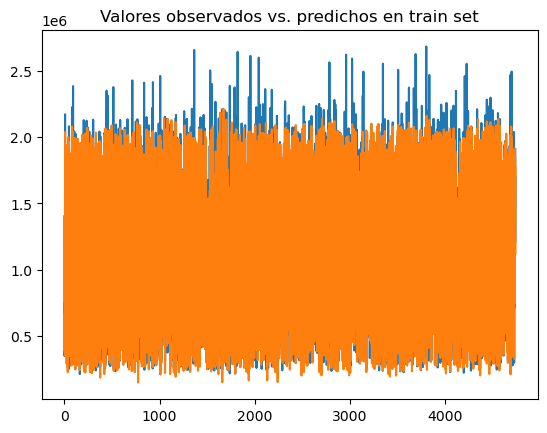

In [23]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set")

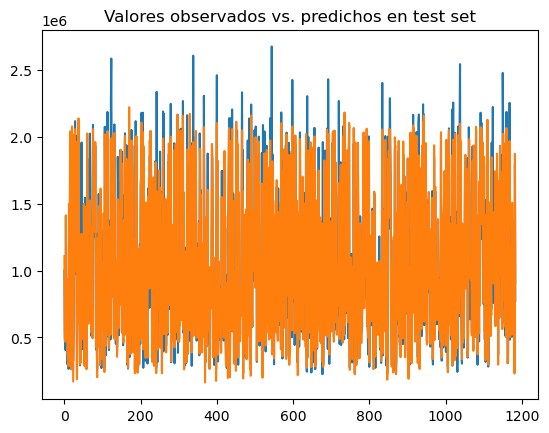

In [24]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

#### 12. Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo.

In [25]:
coeficientes = modelo_regresion.coef_

# Obtén los nombres de las variables de entrada de tu conjunto de datos de entrenamiento
nombres_variables = X_train.columns if isinstance(X_train, pd.DataFrame) else None

# Imprime los nombres de las variables junto con sus coeficientes
for i, coef in enumerate(coeficientes):
    if nombres_variables is not None:
        print(f"Variable: {nombres_variables[i]}, Coeficiente: {coef}")
    else:
        print(f"Variable {i + 1}, Coeficiente: {coef}")

Variable: CPI, Coeficiente: 9427.817469332329
Variable: Fuel_Price, Coeficiente: -6427.983170386477
Variable: Holiday_Flag, Coeficiente: 38569.034351354465
Variable: Month_1, Coeficiente: 1722612006797568.0
Variable: Month_10, Coeficiente: 1722612006845599.5
Variable: Month_11, Coeficiente: 1722612006948877.0
Variable: Month_12, Coeficiente: 1722612006960544.2
Variable: Month_2, Coeficiente: 1722612006907000.0
Variable: Month_3, Coeficiente: 1722612006867194.8
Variable: Month_4, Coeficiente: 1722612006864832.5
Variable: Month_5, Coeficiente: 1722612006868360.8
Variable: Month_6, Coeficiente: 1722612006896478.8
Variable: Month_7, Coeficiente: 1722612006842495.5
Variable: Month_8, Coeficiente: 1722612006875613.5
Variable: Month_9, Coeficiente: 1722612006834140.0
Variable: Store_1, Coeficiente: 57287775290164.28
Variable: Store_10, Coeficiente: 57287776448557.09
Variable: Store_11, Coeficiente: 57287775047303.5
Variable: Store_12, Coeficiente: 57287775737007.25
Variable: Store_13, Coefici

- Las variables con mayor poder explicativo son las referentes al tiempo, año, mes y día de la semana y el número de tienda.

- Adicional podemos observar que el coeficiente de Holiday_Flag es positivo lo que indica que cada que existe una festividad las ventas tienden a incrementar. También el costo del combustible es negativo lo que indica que cuando el precio de este es alto, las ventas decrecen. Estos supuestos me parece que tienen mucha lógica, por lo que se concluye que el modelo está bien y posee un buen desempeño.